In [56]:
from urllib.request import urlopen
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
hold = pd.read_csv('/Users/edwardgorelik/Desktop/Raw/QB Rookie Pressures - QBs.csv')

In [4]:
df = hold.copy()
df = df[pd.notnull(df['DraftYear'])]

In [5]:
df = df[df.dropbacks > 150]

In [6]:
df

,N1,Rookie,DraftYear,Season,player,player_id,position,player_game_count,team_name,dropbacks,...,pressure_hit_as_threw,pressure_drops,pressure_yards,pressure_touchdowns,pressure_interceptions,pressure_dropback_percent,pressure_sack_percent,pressure_completion_percent,pressure_accuracy_percent,pressure_qb_rating
0,False,False,2012.0,2018,Kirk Cousins,7102,QB,16,MIN,669,...,8,7,1425,6,5,38.9,15.4,64.0,75.9,83.1
1,False,False,2012.0,2018,Case Keenum,7323,QB,16,DEN,633,...,11,10,963,5,7,36.0,14.9,42.6,60.0,52.2
2,True,False,2017.0,2018,Patrick Mahomes,11765,QB,16,KC,639,...,16,7,1353,9,8,35.2,11.6,47.6,66.4,70.4
3,True,False,2017.0,2018,Deshaun Watson,11767,QB,16,HST,628,...,7,4,1443,9,5,44.7,21.7,57.9,69.2,88.2
5,False,False,2012.0,2018,Andrew Luck,7007,QB,16,IND,679,...,5,5,1082,8,7,29.5,9.0,56.1,64.6,73.4
8,False,False,2016.0,2018,Jared Goff,10635,QB,16,LAR,615,...,5,9,913,5,5,32.0,17.3,43.3,63.6,59.8
10,False,False,2016.0,2018,Dak Prescott,10769,QB,16,DAL,611,...,6,7,1022,9,2,37.0,24.8,52.6,66.9,87.1
13,False,False,2012.0,2018,Russell Wilson,7077,QB,16,SEA,509,...,4,3,926,10,3,39.7,25.2,47.8,62.0,86.2
14,False,True,2018.0,2018,Josh Rosen,35460,QB,14,ARZ,453,...,6,11,565,1,6,40.4,24.6,41.5,63.1,38.1
15,False,False,2014.0,2018,Derek Carr,8671,QB,16,OAK,612,...,5,8,853,4,8,29.9,27.3,52.7,70.4,58.1


In [7]:
for k,v in df['N1'].iteritems():
    df.loc[k,'N1'] = int(df.DraftYear[k])+1 == int(df.Season[k])

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[1:5])

      N1 Rookie  DraftYear  Season           player  player_id position  \
1  False  False     2012.0    2018      Case Keenum       7323       QB   
2   True  False     2017.0    2018  Patrick Mahomes      11765       QB   
3   True  False     2017.0    2018   Deshaun Watson      11767       QB   
5  False  False     2012.0    2018      Andrew Luck       7007       QB   

   player_game_count team_name  dropbacks  pressure_dropbacks  pressure_sacks  \
1                 16       DEN        633                 228              34   
2                 16        KC        639                 225              26   
3                 16       HST        628                 281              61   
5                 16       IND        679                 200              18   

   pressure_attempts  pressure_completions  pressure_thrown_aways  \
1                188                    80                     26   
2                185                    88                     21   
3          

In [9]:
#You have N1 and Rookie year set to true/false
#Next: Find Rookie Year sack %
players = df.player.unique()
print(players)

['Kirk Cousins' 'Case Keenum' 'Patrick Mahomes' 'Deshaun Watson'
 'Andrew Luck' 'Jared Goff' 'Dak Prescott' 'Russell Wilson' 'Josh Rosen'
 'Derek Carr' 'Cam Newton' 'Sam Darnold' 'Blake Bortles' 'Baker Mayfield'
 'Josh Allen' 'Jameis Winston' 'Carson Wentz' 'Mitchell Trubisky'
 'Andy Dalton' 'Nick Mullens' 'Ryan Tannehill' 'Marcus Mariota'
 'Brock Osweiler' 'Lamar Jackson' 'Nick Foles' 'Jeff Driskel'
 'Cody Kessler' 'CJ Beathard' 'Sam Bradford' 'Trevor Siemian'
 'Tyrod Taylor' 'Colin Kaepernick' 'Matt Barkley' 'Blaine Gabbert'
 'Robert Griffin III' 'Teddy Bridgewater' 'Johnny Manziel'
 'Zach Mettenberger' 'Ryan Mallett' 'Geno Smith' 'Austin Davis'
 'Mike Glennon' 'Jake Locker' 'Brandon Weeden' 'EJ Manuel'
 'Christian Ponder' 'Matt McGloin' 'John Skelton' 'Ryan Lindley'
 'DeShone Kizer' 'Jacoby Brissett' 'Brett Hundley' 'Tom Savage'
 'Jimmy Garoppolo' 'Colt McCoy' 'Tim Tebow' 'Jimmy Clausen']


In [10]:
print(df.columns.values)

['N1' 'Rookie' 'DraftYear' 'Season' 'player' 'player_id' 'position'
 'player_game_count' 'team_name' 'dropbacks' 'pressure_dropbacks'
 'pressure_sacks' 'pressure_attempts' 'pressure_completions'
 'pressure_thrown_aways' 'pressure_hit_as_threw' 'pressure_drops'
 'pressure_yards' 'pressure_touchdowns' 'pressure_interceptions'
 'pressure_dropback_percent' 'pressure_sack_percent'
 'pressure_completion_percent' 'pressure_accuracy_percent'
 'pressure_qb_rating']


In [11]:
use = df[df.DraftYear == df.Season].groupby(['player'])['dropbacks', 'pressure_dropbacks', 'pressure_sacks'].sum()
use

,dropbacks,pressure_dropbacks,pressure_sacks
player,,,
Andrew Luck,703,268,41
Andy Dalton,563,138,24
Baker Mayfield,531,154,25
Blaine Gabbert,475,153,40
Blake Bortles,550,187,54
Brandon Weeden,559,155,27
CJ Beathard,257,101,19
Cam Newton,600,208,35
Carson Wentz,662,197,34


In [12]:
names = use.index.values
names

array(['Andrew Luck', 'Andy Dalton', 'Baker Mayfield', 'Blaine Gabbert',
       'Blake Bortles', 'Brandon Weeden', 'CJ Beathard', 'Cam Newton',
       'Carson Wentz', 'Christian Ponder', 'Cody Kessler', 'Colt McCoy',
       'Dak Prescott', 'DeShone Kizer', 'Derek Carr', 'Deshaun Watson',
       'EJ Manuel', 'Geno Smith', 'Jameis Winston', 'Jared Goff',
       'Jimmy Clausen', 'Josh Allen', 'Josh Rosen', 'Lamar Jackson',
       'Marcus Mariota', 'Matt McGloin', 'Mike Glennon',
       'Mitchell Trubisky', 'Nick Foles', 'Nick Mullens',
       'Robert Griffin III', 'Russell Wilson', 'Ryan Lindley',
       'Ryan Tannehill', 'Sam Bradford', 'Sam Darnold',
       'Teddy Bridgewater', 'Zach Mettenberger'], dtype=object)

In [13]:
after = df[df['player'].isin(names)]
len(after)

116

In [14]:
veteran = after[after.Season > after.DraftYear].groupby(['player'])['dropbacks', 'pressure_dropbacks', 'pressure_sacks'].sum()
col_names = veteran.columns.values
new_names = ['vet_dropbacks', 'vet_pressure_dropbacks', 'vet_pressure_sacks']
cols = dict(zip(col_names, new_names))
veteran = veteran.rename(index=str, columns = cols)
veteran

,vet_dropbacks,vet_pressure_dropbacks,vet_pressure_sacks
player,,,
Andrew Luck,2965,1100,133
Andy Dalton,3759,1046,215
Blaine Gabbert,1035,357,80
Blake Bortles,2432,848,140
Brandon Weeden,301,115,27
CJ Beathard,198,71,18
Cam Newton,3829,1354,249
Carson Wentz,950,319,58
Christian Ponder,846,286,58


In [15]:
result = pd.concat([use, veteran], axis = 1)

In [20]:
result = result.dropna(subset = ['vet_dropbacks'])
result

,dropbacks,pressure_dropbacks,pressure_sacks,vet_dropbacks,vet_pressure_dropbacks,vet_pressure_sacks,r_press_rate
Andrew Luck,703,268,41,2965.0,1100.0,133.0,2.623134
Andy Dalton,563,138,24,3759.0,1046.0,215.0,4.079710
Blaine Gabbert,475,153,40,1035.0,357.0,80.0,3.104575
Blake Bortles,550,187,54,2432.0,848.0,140.0,2.941176
Brandon Weeden,559,155,27,301.0,115.0,27.0,3.606452
CJ Beathard,257,101,19,198.0,71.0,18.0,2.544554
Cam Newton,600,208,35,3829.0,1354.0,249.0,2.884615
Carson Wentz,662,197,34,950.0,319.0,58.0,3.360406
Christian Ponder,342,118,30,846.0,286.0,58.0,2.898305
Cody Kessler,221,104,21,169.0,73.0,21.0,2.125000


In [21]:
result['r_press_rate'] = result.dropbacks/result.pressure_dropbacks
result['r_press_converted'] = result.pressure_dropbacks/result.pressure_sacks
result['vet_press_rate'] = result.vet_dropbacks/result.vet_pressure_dropbacks
result['vet_pressure_sacks'] = result.dropbacks/result.vet_pressure_sacks

In [23]:
result = result[result.vet_dropbacks > 200]

In [97]:
print(len(result))
result = result.rename(index=str, columns={'vet_pressure_sacks' : 'vet_press_converted'})
result


24


,dropbacks,pressure_dropbacks,pressure_sacks,vet_dropbacks,vet_pressure_dropbacks,vet_press_converted,r_press_rate,r_press_converted,vet_press_rate
Andrew Luck,703,268,41,2965.0,1100.0,5.285714,2.623134,6.536585,2.695455
Andy Dalton,563,138,24,3759.0,1046.0,2.618605,4.079710,5.750000,3.593690
Blaine Gabbert,475,153,40,1035.0,357.0,5.937500,3.104575,3.825000,2.899160
Blake Bortles,550,187,54,2432.0,848.0,3.928571,2.941176,3.462963,2.867925
Brandon Weeden,559,155,27,301.0,115.0,20.703704,3.606452,5.740741,2.617391
Cam Newton,600,208,35,3829.0,1354.0,2.409639,2.884615,5.942857,2.827917
Carson Wentz,662,197,34,950.0,319.0,11.413793,3.360406,5.794118,2.978056
Christian Ponder,342,118,30,846.0,286.0,5.896552,2.898305,3.933333,2.958042
Colt McCoy,260,77,23,534.0,179.0,7.878788,3.376623,3.347826,2.983240
Dak Prescott,513,182,24,1165.0,429.0,5.829545,2.818681,7.583333,2.715618


In [120]:
x = result['r_press_rate']
y = result['vet_press_rate']

x = sm.add_constant(x)

model = sm.OLS(y,x)
fitted = model.fit()

predictions = fitted.predict(x)

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         vet_press_rate   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     9.297
Date:                Sun, 10 Mar 2019   Prob (F-statistic):            0.00588
Time:                        18:47:54   Log-Likelihood:                -6.2324
No. Observations:                  24   AIC:                             16.46
Df Residuals:                      22   BIC:                             18.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4878      0.443      3.355   

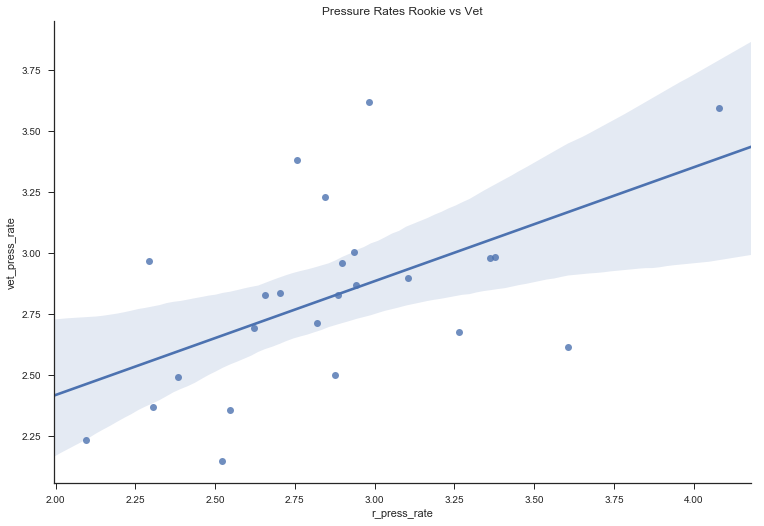

In [131]:
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sb.regplot(result['r_press_rate'],result['vet_press_rate'], ax=ax).set_title('Pressure Rates Rookie vs Vet')#scatter = True)
sb.despine()

<Container object of 3 artists>

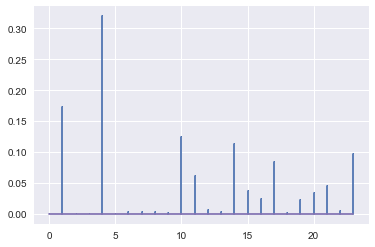

In [69]:
influence = fitted.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

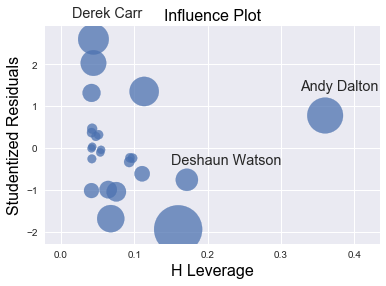

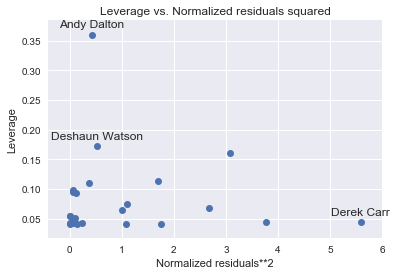

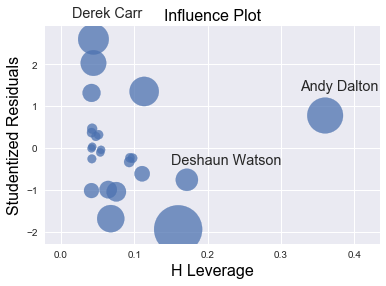

In [70]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(fitted)
influence_plot(fitted)

In [122]:
new_press = result.drop(['Andy Dalton'])

In [123]:
x = new_press['r_press_rate']
y = new_press['vet_press_rate']

x = sm.add_constant(x)

In [124]:
model = sm.OLS(y,x)
fitted = model.fit()

In [125]:
predictions = fitted.predict(x)

In [126]:

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         vet_press_rate   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     4.084
Date:                Sun, 10 Mar 2019   Prob (F-statistic):             0.0562
Time:                        18:49:07   Log-Likelihood:                -6.1365
No. Observations:                  23   AIC:                             16.27
Df Residuals:                      21   BIC:                             18.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7169      0.536      3.204   

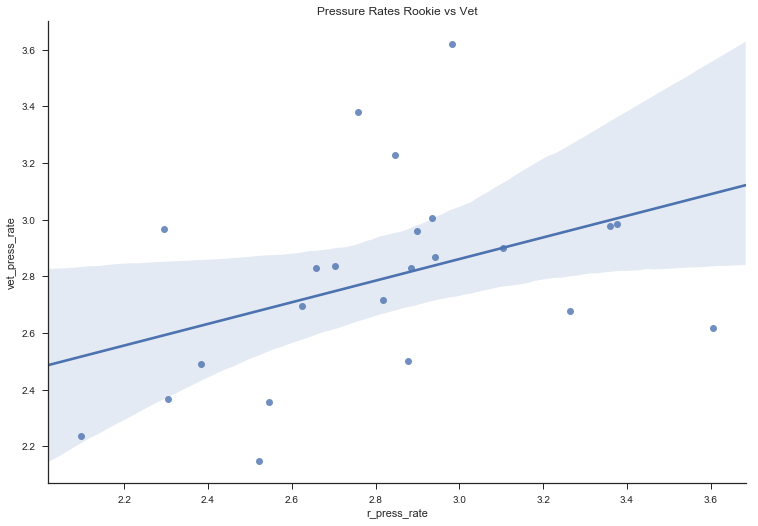

In [130]:
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sb.regplot(new_press['r_press_rate'],new_press['vet_press_rate'], ax=ax).set_title('Pressure Rates Rookie vs Vet')#scatter = True)
sb.despine()

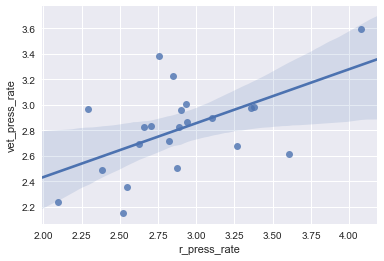

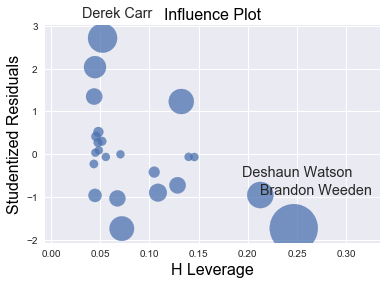

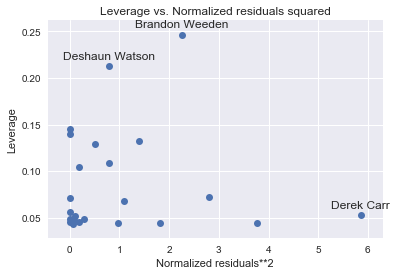

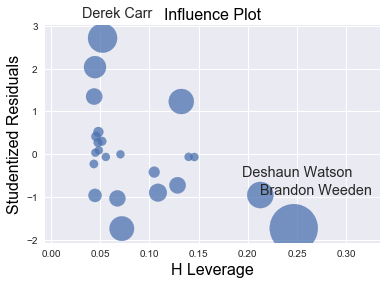

In [94]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(fitted)
influence_plot(fitted)

In [98]:
x = result['r_press_converted']
y = result['vet_press_converted']

x = sm.add_constant(x)

model = sm.OLS(y,x)
fitted = model.fit()

predictions = fitted.predict(x)

print(fitted.summary())

                             OLS Regression Results                            
Dep. Variable:     vet_press_converted   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                 -0.038
Method:                  Least Squares   F-statistic:                    0.1643
Date:                 Sun, 10 Mar 2019   Prob (F-statistic):              0.689
Time:                         18:10:26   Log-Likelihood:                -79.609
No. Observations:                   24   AIC:                             163.2
Df Residuals:                       22   BIC:                             165.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.1027

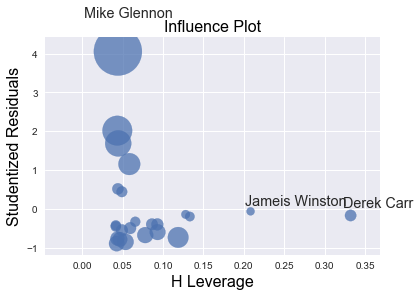

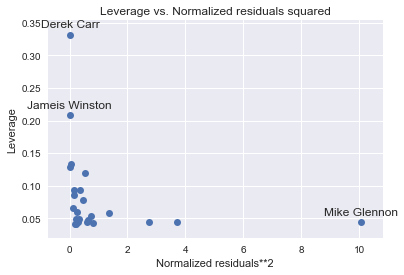

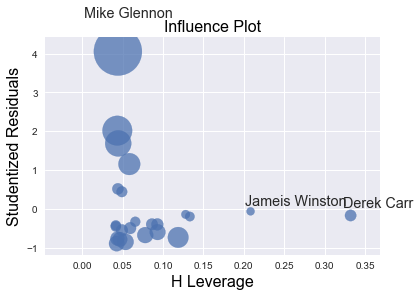

In [99]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(fitted)
influence_plot(fitted)

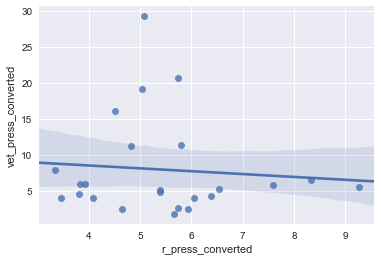

In [100]:
sb.regplot(result['r_press_converted'],result['vet_press_converted'])

In [101]:
len(result)

24

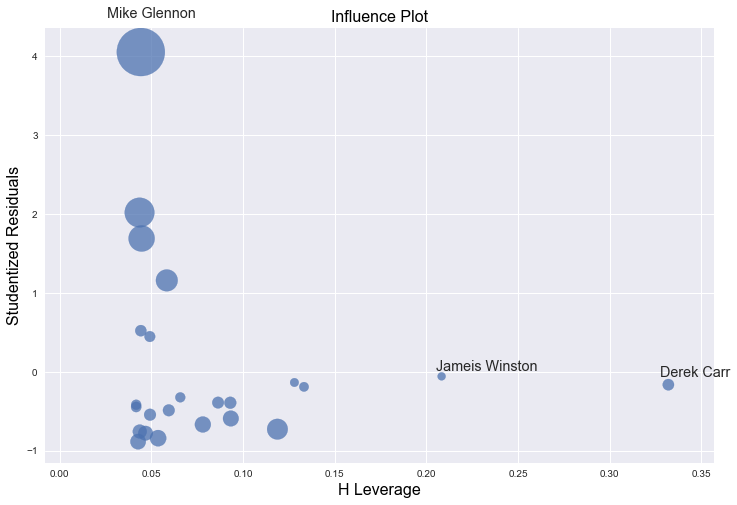

In [102]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fitted, alpha  = 0.05, ax = ax, criterion="cooks")

In [132]:
new_sack = result.drop(['Mike Glennon', 'Derek Carr'])

In [104]:
x = new['r_press_converted']
y = new['vet_press_converted']

x = sm.add_constant(x)

model = sm.OLS(y,x)
fitted = model.fit()

predictions = fitted.predict(x)

print(fitted.summary())

                             OLS Regression Results                            
Dep. Variable:     vet_press_converted   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.048
Method:                  Least Squares   F-statistic:                   0.03348
Date:                 Sun, 10 Mar 2019   Prob (F-statistic):              0.857
Time:                         18:35:03   Log-Likelihood:                -67.571
No. Observations:                   22   AIC:                             139.1
Df Residuals:                       20   BIC:                             141.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.9758

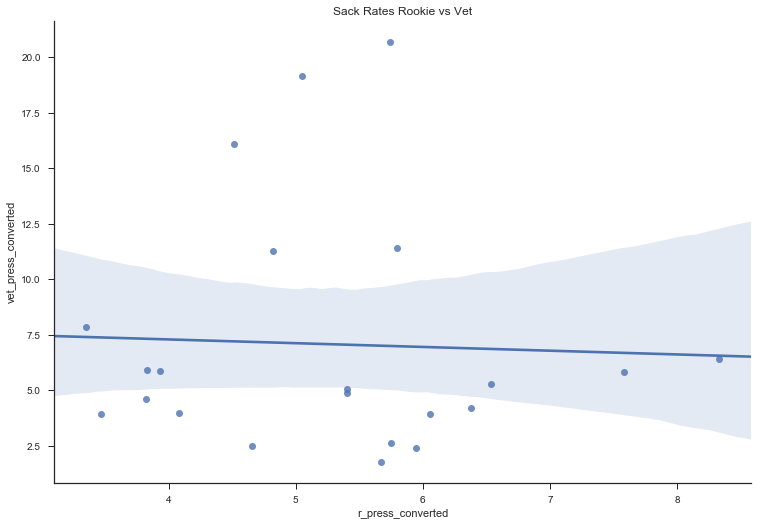

In [134]:
sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 8.5)
sb.regplot(new_sack['r_press_converted'],new_sack['vet_press_converted'], ax=ax).set_title('Sack Rates Rookie vs Vet')#scatter = True)
sb.despine()

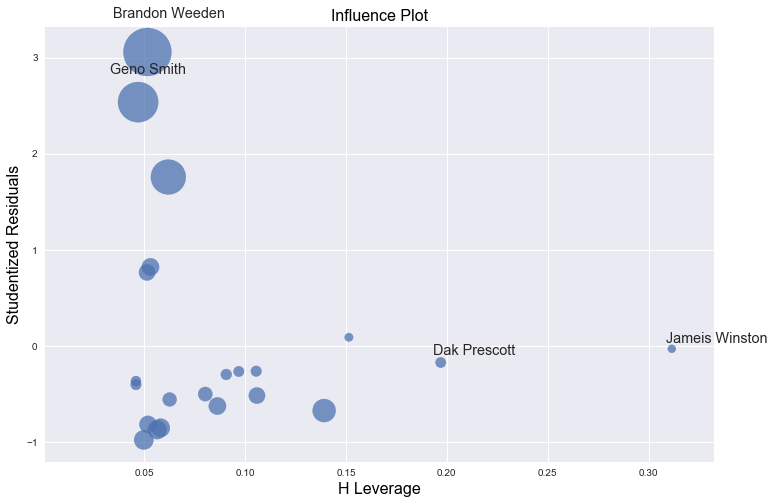

In [106]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(fitted, alpha  = 0.05, ax = ax, criterion="cooks")